<a href="https://colab.research.google.com/github/Farah-S/sonar-rock-classification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

### For reading .csv files ###
import pandas as pd

### For encoding categories ###
from sklearn.preprocessing import LabelEncoder

### For Feature Selection ###
from sklearn.feature_selection import VarianceThreshold

### For visualizing data ###
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import parallel_coordinates

### For the visualization themes ###
import seaborn as sns

### For splitting data into test/train ###
from sklearn.model_selection import train_test_split

### SVM ready-made function ### 
from sklearn.svm import SVC

### For Evaluating Models ###
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [ ]:
### Import Dataset from Github ###

sonar=pd.read_csv("https://raw.githubusercontent.com/Farah-S/sonar-rock-classification/main/sonar.csv")

### Print first 5 records of data ###
sonar.head(5)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [ ]:
### Copy Features without Labels into X ### 
X = sonar.copy()
labels=  X.pop('Class')


"""
    N.B.
          Label Encoder turns the labels into numerical values,
          in our case there's only two classes so they're encoded
          into 0 / 1
"""

### Initialize the Label Encoder ###
le = LabelEncoder()

### Add a column with the encoded categories ###
sonar['Class_enc'] = le.fit_transform(sonar['Class'])


### Copy encoded labels into y ### 
y=sonar['Class_enc']


print(X)
print("_" * 125)
print(labels)
print("_" * 125)
print(y)

     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0         0.0200       0.0371       0.0428       0.0207       0.0954   
1         0.0453       0.0523       0.0843       0.0689       0.1183   
2         0.0262       0.0582       0.1099       0.1083       0.0974   
3         0.0100       0.0171       0.0623       0.0205       0.0205   
4         0.0762       0.0666       0.0481       0.0394       0.0590   
..           ...          ...          ...          ...          ...   
203       0.0187       0.0346       0.0168       0.0177       0.0393   
204       0.0323       0.0101       0.0298       0.0564       0.0760   
205       0.0522       0.0437       0.0180       0.0292       0.0351   
206       0.0303       0.0353       0.0490       0.0608       0.0167   
207       0.0260       0.0363       0.0136       0.0272       0.0214   

     attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0         0.0986       0.1539       0.1601       0.3109  

# Without feature selection



In [ ]:
### stratify: split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

### Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time the code is run

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)

(SVM using RBF kernel with C= 0.1 )

Score: 0.5769230769230769 

Confusion Matrix

[[28  0]
 [22  2]]


Classification Report

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        28
           1       1.00      0.08      0.15        24

    accuracy                           0.58        52
   macro avg       0.78      0.54      0.44        52
weighted avg       0.76      0.58      0.46        52


ROC AUC Score: 0.5416666666666666


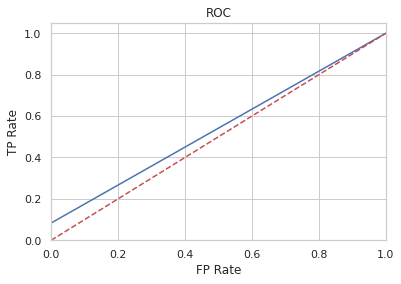

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 0.2 )

Score: 0.6923076923076923 

Confusion Matrix

[[24  4]
 [12 12]]


Classification Report

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        28
           1       0.75      0.50      0.60        24

    accuracy                           0.69        52
   macro avg       0.71      0.68      0.68        52
weighted avg       0.71      0.69      0.68        52


ROC AUC Score: 0.6785714285714286


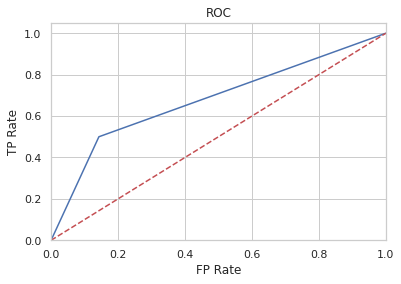

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 0.30000000000000004 )

Score: 0.7115384615384616 

Confusion Matrix

[[22  6]
 [ 9 15]]


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.71      0.62      0.67        24

    accuracy                           0.71        52
   macro avg       0.71      0.71      0.71        52
weighted avg       0.71      0.71      0.71        52


ROC AUC Score: 0.7053571428571428


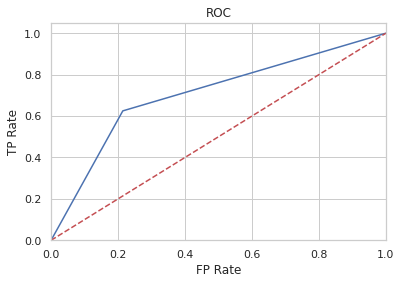

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 0.4 )

Score: 0.7692307692307693 

Confusion Matrix

[[23  5]
 [ 7 17]]


Classification Report

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.77      0.71      0.74        24

    accuracy                           0.77        52
   macro avg       0.77      0.76      0.77        52
weighted avg       0.77      0.77      0.77        52


ROC AUC Score: 0.7648809523809524


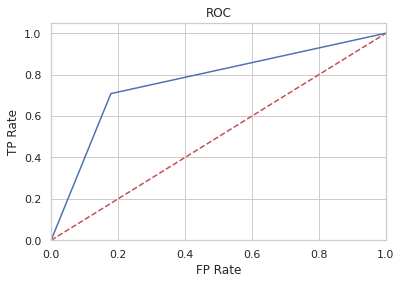

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 0.5 )

Score: 0.8076923076923077 

Confusion Matrix

[[25  3]
 [ 7 17]]


Classification Report

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.85      0.71      0.77        24

    accuracy                           0.81        52
   macro avg       0.82      0.80      0.80        52
weighted avg       0.81      0.81      0.81        52


ROC AUC Score: 0.8005952380952382


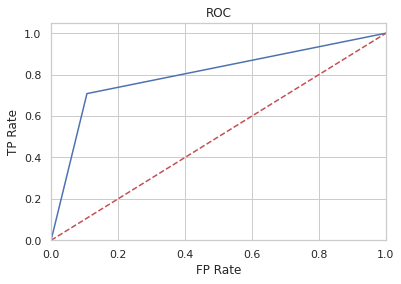

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 0.6 )

Score: 0.8653846153846154 

Confusion Matrix

[[28  0]
 [ 7 17]]


Classification Report

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       1.00      0.71      0.83        24

    accuracy                           0.87        52
   macro avg       0.90      0.85      0.86        52
weighted avg       0.89      0.87      0.86        52


ROC AUC Score: 0.8541666666666667


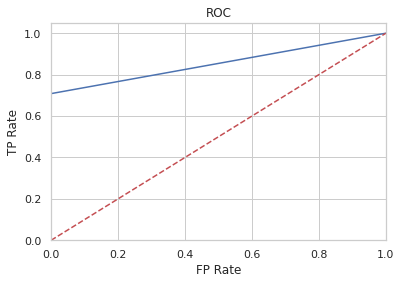

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 0.7000000000000001 )

Score: 0.8653846153846154 

Confusion Matrix

[[28  0]
 [ 7 17]]


Classification Report

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       1.00      0.71      0.83        24

    accuracy                           0.87        52
   macro avg       0.90      0.85      0.86        52
weighted avg       0.89      0.87      0.86        52


ROC AUC Score: 0.8541666666666667


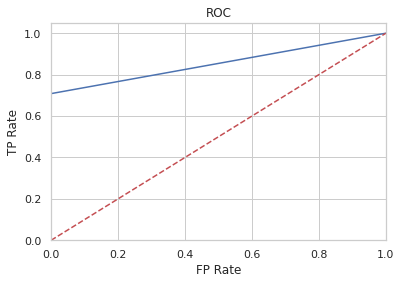

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 0.8 )

Score: 0.8846153846153846 

Confusion Matrix

[[28  0]
 [ 6 18]]


Classification Report

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        28
           1       1.00      0.75      0.86        24

    accuracy                           0.88        52
   macro avg       0.91      0.88      0.88        52
weighted avg       0.90      0.88      0.88        52


ROC AUC Score: 0.875


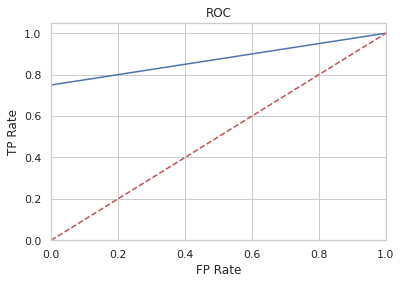

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 0.9 )

Score: 0.8653846153846154 

Confusion Matrix

[[27  1]
 [ 6 18]]


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        28
           1       0.95      0.75      0.84        24

    accuracy                           0.87        52
   macro avg       0.88      0.86      0.86        52
weighted avg       0.88      0.87      0.86        52


ROC AUC Score: 0.8571428571428571


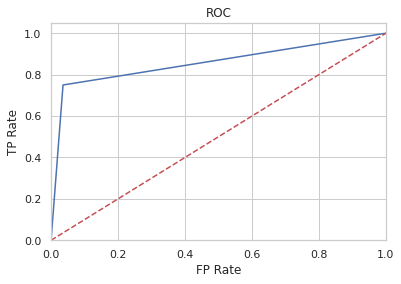

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.0 )

Score: 0.8653846153846154 

Confusion Matrix

[[27  1]
 [ 6 18]]


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        28
           1       0.95      0.75      0.84        24

    accuracy                           0.87        52
   macro avg       0.88      0.86      0.86        52
weighted avg       0.88      0.87      0.86        52


ROC AUC Score: 0.8571428571428571


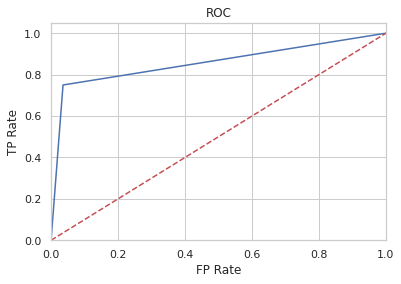

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.1 )

Score: 0.8846153846153846 

Confusion Matrix

[[28  0]
 [ 6 18]]


Classification Report

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        28
           1       1.00      0.75      0.86        24

    accuracy                           0.88        52
   macro avg       0.91      0.88      0.88        52
weighted avg       0.90      0.88      0.88        52


ROC AUC Score: 0.875


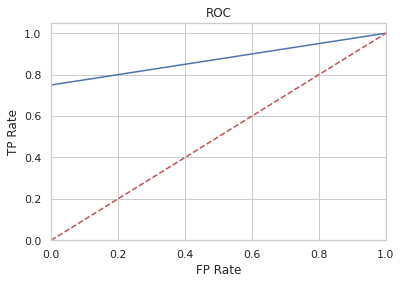

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.2000000000000002 )

Score: 0.8846153846153846 

Confusion Matrix

[[28  0]
 [ 6 18]]


Classification Report

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        28
           1       1.00      0.75      0.86        24

    accuracy                           0.88        52
   macro avg       0.91      0.88      0.88        52
weighted avg       0.90      0.88      0.88        52


ROC AUC Score: 0.875


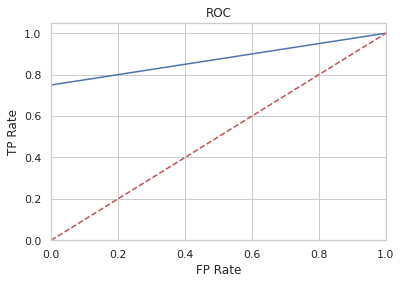

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.3000000000000003 )

Score: 0.9038461538461539 

Confusion Matrix

[[28  0]
 [ 5 19]]


Classification Report

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.79      0.88        24

    accuracy                           0.90        52
   macro avg       0.92      0.90      0.90        52
weighted avg       0.92      0.90      0.90        52


ROC AUC Score: 0.8958333333333333


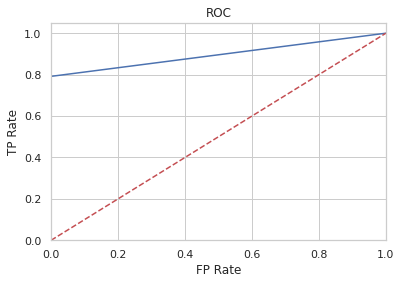

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.4000000000000001 )

Score: 0.8846153846153846 

Confusion Matrix

[[27  1]
 [ 5 19]]


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.95      0.79      0.86        24

    accuracy                           0.88        52
   macro avg       0.90      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52


ROC AUC Score: 0.8779761904761905


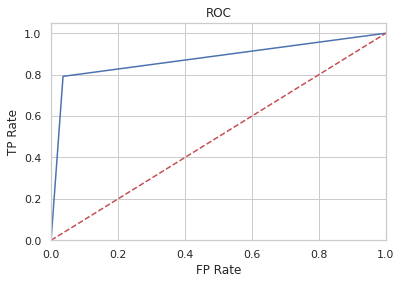

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.5000000000000002 )

Score: 0.9038461538461539 

Confusion Matrix

[[27  1]
 [ 4 20]]


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.95      0.83      0.89        24

    accuracy                           0.90        52
   macro avg       0.91      0.90      0.90        52
weighted avg       0.91      0.90      0.90        52


ROC AUC Score: 0.8988095238095238


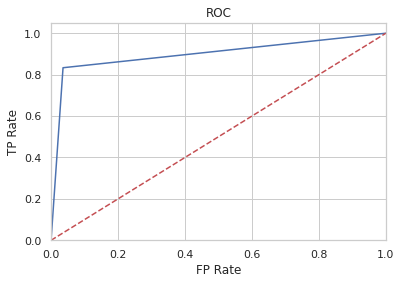

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.6 )

Score: 0.8846153846153846 

Confusion Matrix

[[26  2]
 [ 4 20]]


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.91      0.83      0.87        24

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52


ROC AUC Score: 0.880952380952381


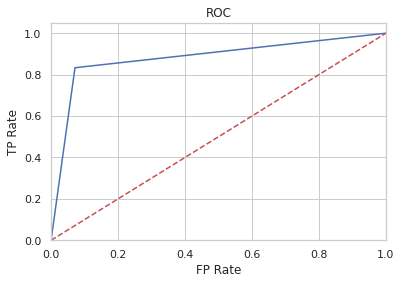

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.7000000000000002 )

Score: 0.8846153846153846 

Confusion Matrix

[[26  2]
 [ 4 20]]


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.91      0.83      0.87        24

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52


ROC AUC Score: 0.880952380952381


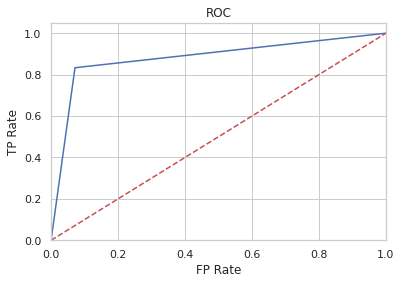

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.8000000000000003 )

Score: 0.8846153846153846 

Confusion Matrix

[[26  2]
 [ 4 20]]


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.91      0.83      0.87        24

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52


ROC AUC Score: 0.880952380952381


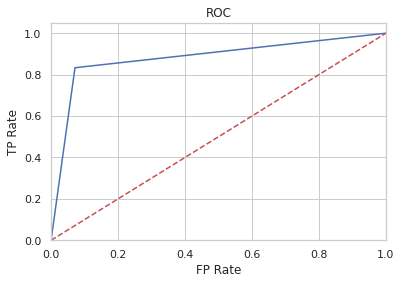

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 1.9000000000000001 )

Score: 0.8846153846153846 

Confusion Matrix

[[26  2]
 [ 4 20]]


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.91      0.83      0.87        24

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52


ROC AUC Score: 0.880952380952381


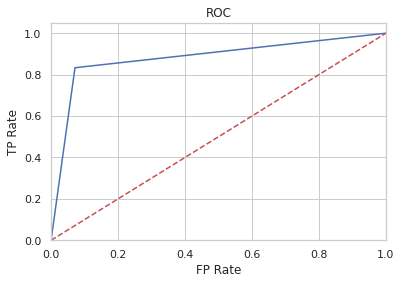

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.0 )

Score: 0.9038461538461539 

Confusion Matrix

[[27  1]
 [ 4 20]]


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.95      0.83      0.89        24

    accuracy                           0.90        52
   macro avg       0.91      0.90      0.90        52
weighted avg       0.91      0.90      0.90        52


ROC AUC Score: 0.8988095238095238


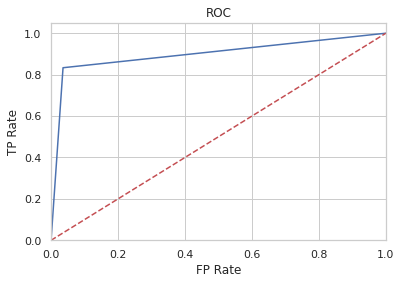

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.1 )

Score: 0.9038461538461539 

Confusion Matrix

[[27  1]
 [ 4 20]]


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.95      0.83      0.89        24

    accuracy                           0.90        52
   macro avg       0.91      0.90      0.90        52
weighted avg       0.91      0.90      0.90        52


ROC AUC Score: 0.8988095238095238


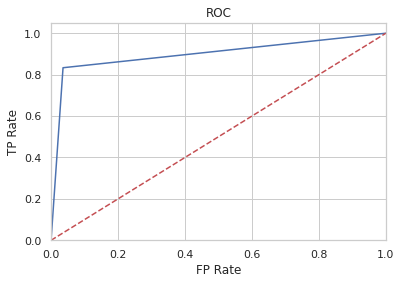

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.2 )

Score: 0.9230769230769231 

Confusion Matrix

[[27  1]
 [ 3 21]]


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.95      0.88      0.91        24

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52


ROC AUC Score: 0.9196428571428572


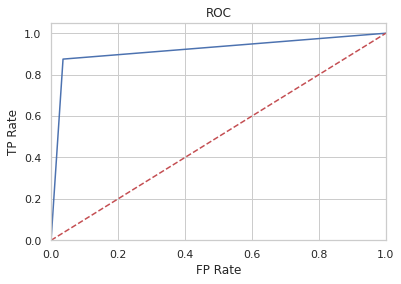

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.3000000000000003 )

Score: 0.9230769230769231 

Confusion Matrix

[[27  1]
 [ 3 21]]


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.95      0.88      0.91        24

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52


ROC AUC Score: 0.9196428571428572


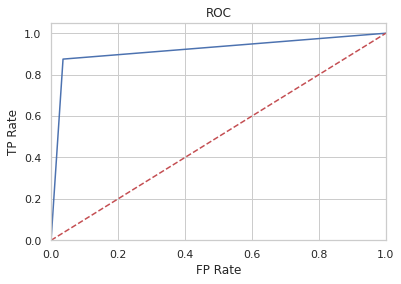

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.4000000000000004 )

Score: 0.9423076923076923 

Confusion Matrix

[[27  1]
 [ 2 22]]


Classification Report

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.96      0.92      0.94        24

    accuracy                           0.94        52
   macro avg       0.94      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52


ROC AUC Score: 0.9404761904761905


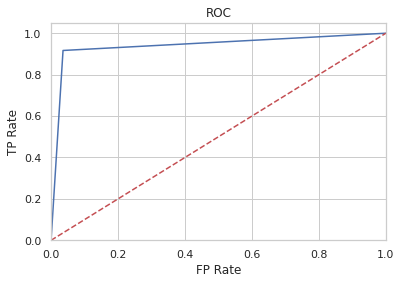

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.5000000000000004 )

Score: 0.9615384615384616 

Confusion Matrix

[[28  0]
 [ 2 22]]


Classification Report

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.92      0.96        24

    accuracy                           0.96        52
   macro avg       0.97      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52


ROC AUC Score: 0.9583333333333333


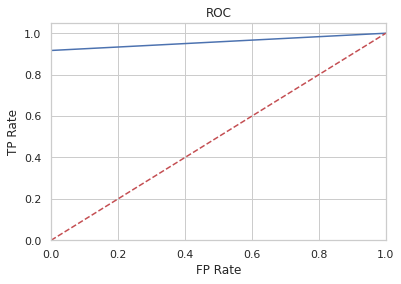

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.6 )

Score: 0.9615384615384616 

Confusion Matrix

[[28  0]
 [ 2 22]]


Classification Report

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.92      0.96        24

    accuracy                           0.96        52
   macro avg       0.97      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52


ROC AUC Score: 0.9583333333333333


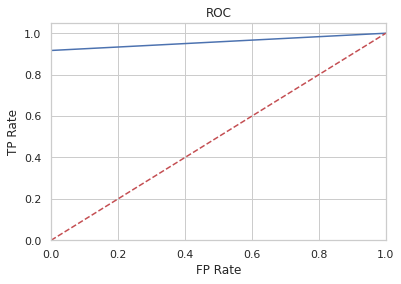

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.7 )

Score: 0.9615384615384616 

Confusion Matrix

[[28  0]
 [ 2 22]]


Classification Report

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.92      0.96        24

    accuracy                           0.96        52
   macro avg       0.97      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52


ROC AUC Score: 0.9583333333333333


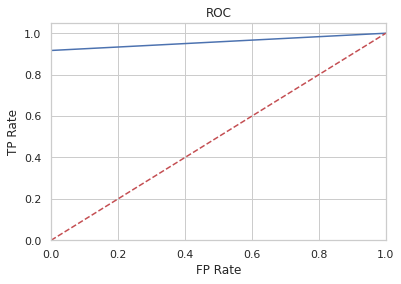

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.8000000000000003 )

Score: 0.9615384615384616 

Confusion Matrix

[[28  0]
 [ 2 22]]


Classification Report

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.92      0.96        24

    accuracy                           0.96        52
   macro avg       0.97      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52


ROC AUC Score: 0.9583333333333333


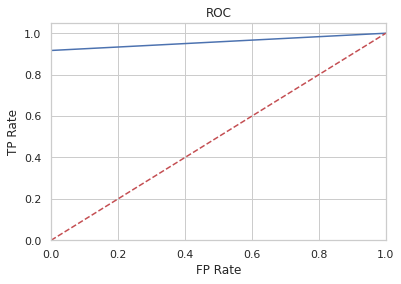

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 2.9000000000000004 )

Score: 0.9615384615384616 

Confusion Matrix

[[27  1]
 [ 1 23]]


Classification Report

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.96      0.96      0.96        24

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52


ROC AUC Score: 0.9613095238095238


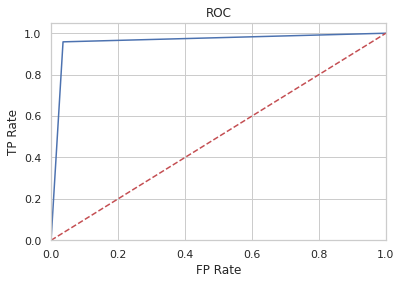

_____________________________________________________________________________________________________________________________
(SVM using RBF kernel with C= 3.0000000000000004 )

Score: 0.9615384615384616 

Confusion Matrix

[[27  1]
 [ 1 23]]


Classification Report

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.96      0.96      0.96        24

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52


ROC AUC Score: 0.9613095238095238


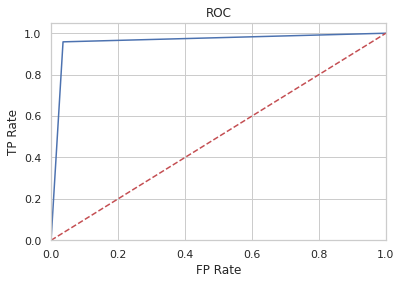

_____________________________________________________________________________________________________________________________


In [ ]:
### try c in range 0.1 - 3.1 with step 0.1
c = np.arange(0.1, 3.1, 0.1)

for c in c:
    print("(SVM using RBF kernel with C=",c,")\n")

    ###
    model = SVC(kernel='rbf', C = c, probability=True).fit(X_train, y_train)
    
    y_pred=model.predict(X_test)
    
    ###
    print("Score:", model.score(X_test, y_test),"\n")

    # Print the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix\n")
    print(cm)

    # Print the Classification Report
    cr = classification_report(y_test, y_pred)
    print("\n\nClassification Report\n")
    print(cr)


    # Print the Receiver operating characteristic Auc score
    auc_score = roc_auc_score(y_test, y_pred)
    print("\nROC AUC Score:",auc_score)

    # Get probabilities.
    y_pred_proba = model.predict_proba(X_test)

    # Get False Positive rate, True Positive rate and the threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Visualize the ROC curve.
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC')
    plt.show()

    print("_" * 125)



# With Feature selection

In [ ]:
v_threshold = VarianceThreshold(threshold=0.008)
v_threshold.fit(X)
print(v_threshold.get_support())
allfeatures=v_threshold.get_support()

[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False]


In [ ]:
selected_features=[]
j=1
for i in allfeatures:
  if(i==True):
    selected_features.append('attribute_' + str(j))
  j+=1

# print(len(selected_features))

In [ ]:
### read data again but only the selected columns ###
df = pd.read_csv("https://raw.githubusercontent.com/Farah-S/sonar-rock-classification/main/sonar.csv", usecols=selected_features)

x2=df.copy()
df['Class_enc'] = le.fit_transform(sonar['Class'])

y2=df['Class_enc']

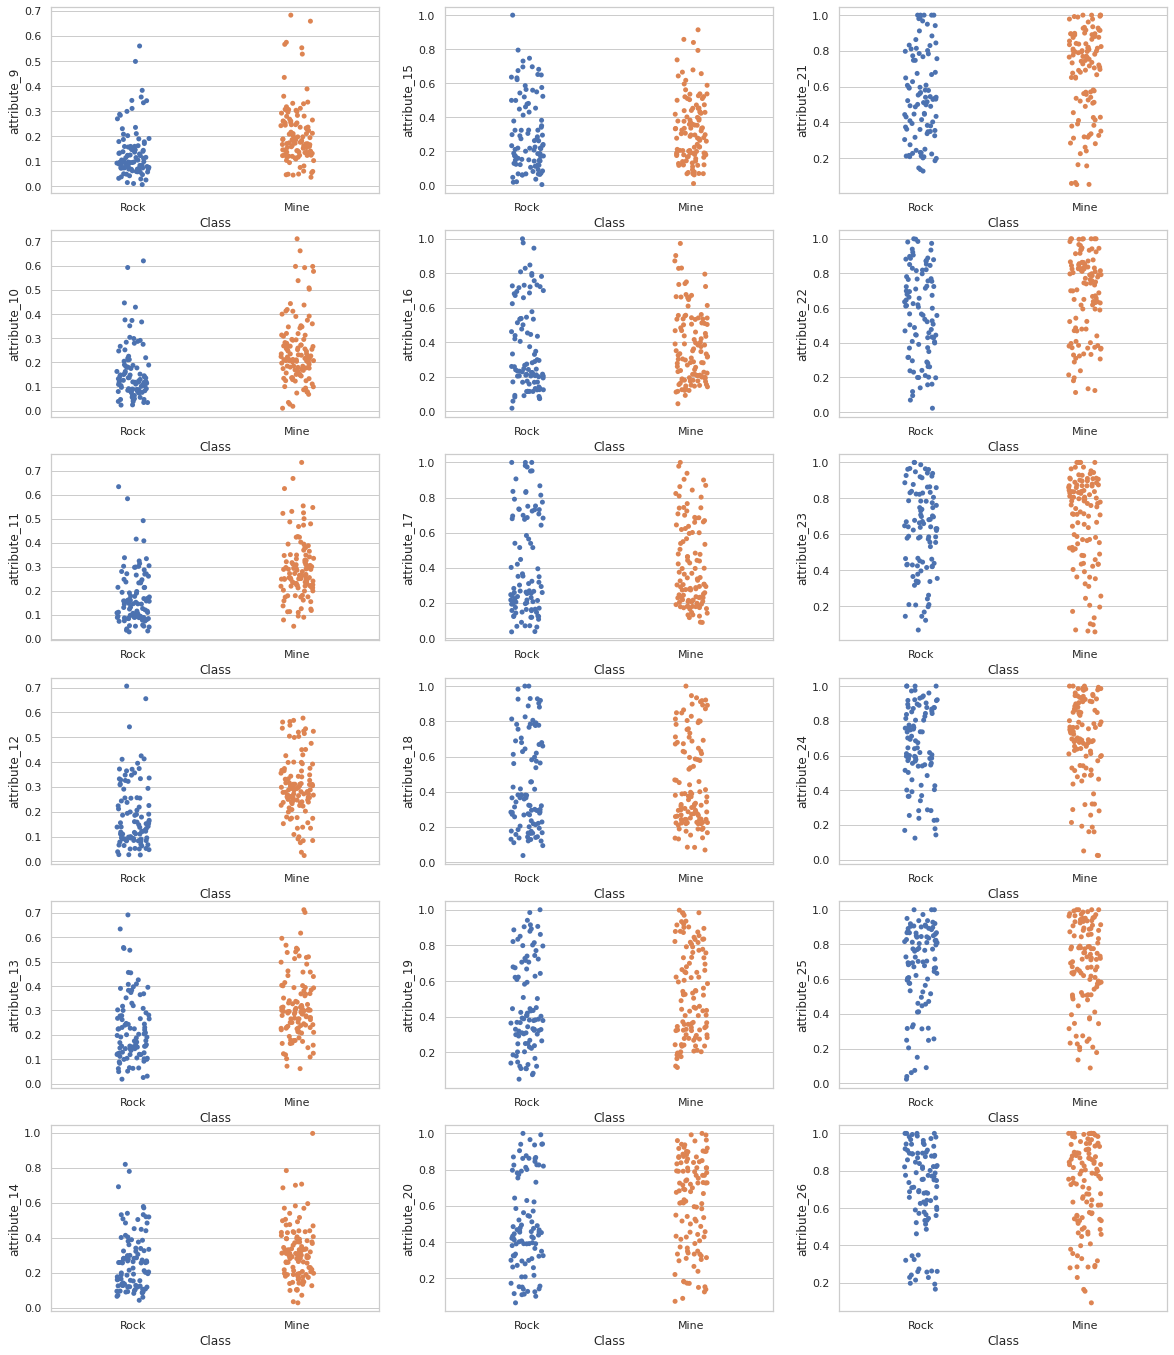

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(6, 3, sharey=False, sharex=False, figsize=(20,24))

### print a 3x6 grid of plots in this cell ###
x=0
for i in range(0,3):
  for j in range(0,6):
    if x>=18:
      break;
    sns.stripplot(x=sonar["Class"], y=sonar[selected_features[x]], data=sonar, ax=axes[j,i])
    x+=1
  if x>=18:
      break;


In [ ]:
fig2, axes2 = plt.subplots(7, 3, sharey=False, sharex=False, figsize=(20,24))

### print the 3x7 grid of plots left in this cell ###
for i in range(0,3):
  for j in range(0,7):
    if x>=len(selected_features):
      break;
    sns.stripplot(x=sonar["Class"], y=sonar[selected_features[x]], data=sonar, ax=axes2[j,i])
    x+=1
  if x>=len(selected_features):
      break;

In [ ]:
df_train, df_test, dfy_train, dfy_test = train_test_split(x2, y2, test_size=0.25, random_state=2, stratify=y2)

In [ ]:
c = np.arange(0.1, 3.1, 0.1)

for c in c:
    # print(df_train)
    # print(dfy_train)
    print("(SVM using RBF kernel with C=",c,")")

    model = SVC(kernel='rbf', C = c, probability=True).fit(df_train, dfy_train)

    y_pred=model.predict(df_test)
    # print(model.predict_proba(X_test))

    print("\nScore:", model.score(df_test, dfy_test))

    # Print the Confusion Matrix
    cm = confusion_matrix(dfy_test, y_pred)
    print("\nConfusion Matrix")
    print(cm)

    # Print the Classification Report
    cr = classification_report(dfy_test, y_pred)
    print("\nClassification Report")
    print(cr)


    # Print the Receiver operating characteristic Auc score
    auc_score = roc_auc_score(dfy_test, y_pred)
    print("\nROC AUC Score:",auc_score)

    # Get probabilities.
    y_pred_proba = model.predict_proba(df_test)

    # Get False Positive rate, True Positive rate and the threshold
    fpr, tpr, thresholds = roc_curve(dfy_test, y_pred)

    # Visualize the ROC curve.
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC')
    plt.show()

    print("_" * 125)